In [1]:
import pandas as pd
import numpy as np

import gensim
import nltk
nltk.download('punkt')

import seaborn as sns
import matplotlib.pyplot as plt

import ast

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, LSTM

from joblib import dump, load

from matplotlib.ticker import MultipleLocator

# In this notebook, I test different machine learning methods to predict genre of songs, using sentiment. These will be used in the ensemble model and compared individually.

In [3]:
sent_data_subset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/train_clean_w_sentiment.csv')

In [4]:
sent_data_subset_line = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/train_sentiment_lines_sciclone_complete.csv')

In [5]:
sent_data_subset.head(2)

,Unnamed: 0.1,Unnamed: 0,Artist,Song,Genre,Language,Lyrics,Sentiment
0,0,78168,franz ferdinand,swallow smile,Rock,en,I rise and curse the waking day\nCurse the gri...,0
1,1,155890,ry cooder,big bad bill is sweet william now,Rock,en,In the town of Louisville they got a man they ...,-1


In [6]:
sent_data_subset_line.head(2)

,Unnamed: 0.1,Unnamed: 0,Artist,Song,Genre,Language,Lyrics,Lyrics as Lists,SentimentLines
0,0,78168,franz ferdinand,swallow smile,Rock,en,I rise and curse the waking day\nCurse the gri...,"['I rise and curse the waking day', 'Curse the...","[-1, -1, 0, 0, 0, -1, 0, -1, 0, 2, 0, -2, -2, ..."
1,1,155890,ry cooder,big bad bill is sweet william now,Rock,en,In the town of Louisville they got a man they ...,['In the town of Louisville they got a man the...,"[0, -1, 0, -3, 0, -2, 0, 0, 0, -3, 1, 0, 0, 0,..."


## Song - Level Models

### 1. Split data into training and testing

Use same split as in the other content model

In [6]:
# stratify so it doesn't just grab a couple of the genres. it needs to sample from all the genres
train_lr_sent, val_lr_sent = train_test_split(sent_data_subset, test_size=0.2, random_state=24, stratify = sent_data_subset['Genre'])

In [7]:
print(train_lr_sent['Genre'].value_counts())
print(val_lr_sent['Genre'].value_counts())

Metal         1200
Folk          1200
Country       1200
Hip-Hop       1200
Rock          1200
Jazz          1200
Electronic    1200
Pop           1200
Indie         1200
R&B           1200
Name: Genre, dtype: int64
Hip-Hop       300
Country       300
Pop           300
Folk          300
R&B           300
Jazz          300
Rock          300
Electronic    300
Indie         300
Metal         300
Name: Genre, dtype: int64


In [8]:
X_train = train_lr_sent['Sentiment']
y_train = train_lr_sent['Genre']

X_val = val_lr_sent['Sentiment']
y_val = val_lr_sent['Genre']

### 2. Logistic Regression

#### a. Train the model

In [ ]:
model_lr_sent = LogisticRegression(max_iter=10000, penalty = 'l2')
model_lr_sent.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

y_pred = model_lr_sent.predict(np.array(X_val).reshape(-1,1))

#### b. Evaluate the model

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
#classification_report = classification_report(y_val, y_pred)

In [ ]:
print("Validation Accuracy:", accuracy)
#print("Validation Classification Report:\n", classification_report)

Validation Accuracy: 0.152


In [ ]:
class_indices = model_lr_sent.classes_
class_indices

array(['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock'], dtype=object)

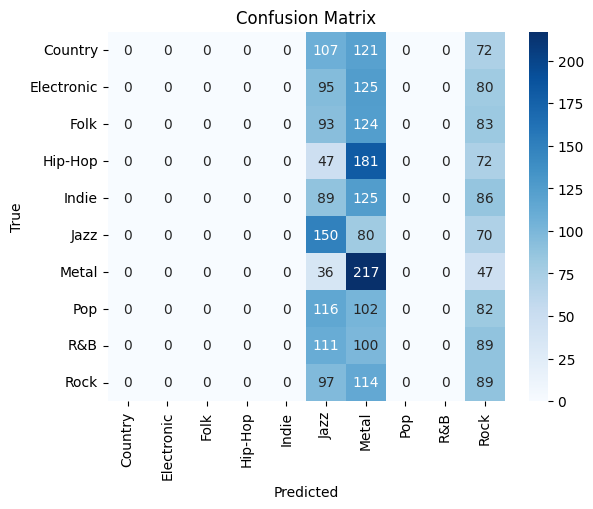

In [ ]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_val, y_pred, labels = genre_names)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 3. K-Nearest-Neighbors (knn)

#### a. Train the model

In [ ]:
dif_k_results = []
# note: only odd numbers bc ties

for k in range(1,101,2):
  model_knn_sent = KNeighborsClassifier(n_neighbors = k)
  model_knn_sent.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

  y_pred = model_knn_sent.predict(np.array(X_val).reshape(-1,1))

  accuracy = accuracy_score(y_val, y_pred)

  dif_k_results.append(accuracy)

In [ ]:
# dif_k_results
# max was k = 73

#### b. Evaluate the best model

  run knn with the best k (73)

In [ ]:
model_knn_sent = KNeighborsClassifier(n_neighbors = 73)
model_knn_sent.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

y_pred = model_knn_sent.predict(np.array(X_val).reshape(-1,1))

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.153


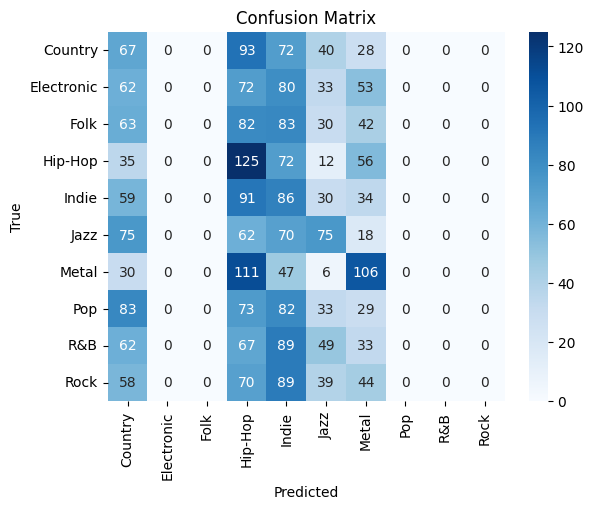

In [ ]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_val, y_pred, labels = genre_names)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 4. Naive Bayes Classifier

#### a. Train The Model

Calculating the percentage of songs in each genre

In [ ]:
genre_percent = sent_data_subset['Genre'].value_counts(normalize=True) * 100
genre_percent

Rock          10.0
Pop           10.0
Metal         10.0
Jazz          10.0
Indie         10.0
Hip-Hop       10.0
Folk          10.0
Country       10.0
Electronic    10.0
R&B           10.0
Name: Genre, dtype: float64

In [ ]:
priors = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [ ]:
model_nb_sent = GaussianNB(priors=priors)
model_nb_sent.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

GaussianNB(priors=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [ ]:
y_pred = model_nb_sent.predict(np.array(X_val).reshape(-1,1))

#### b. Evaluate the Model

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.151


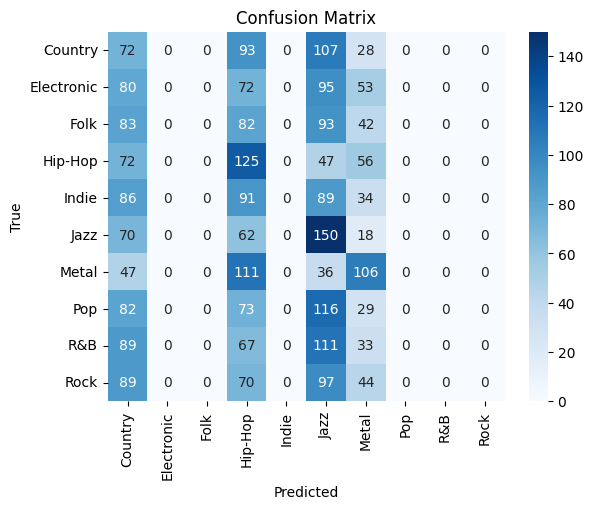

In [ ]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_val, y_pred, labels = genre_names)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 5. Decision Tree Classifier

#### a. Train the Model

In [9]:
model_dtc_sent = DecisionTreeClassifier()
model_dtc_sent.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

DecisionTreeClassifier()

In [10]:
y_pred = model_dtc_sent.predict(np.array(X_val).reshape(-1,1))

#### b. Evaluate the Model

In [11]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.153


In [12]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_val, y_pred, labels = genre_names)

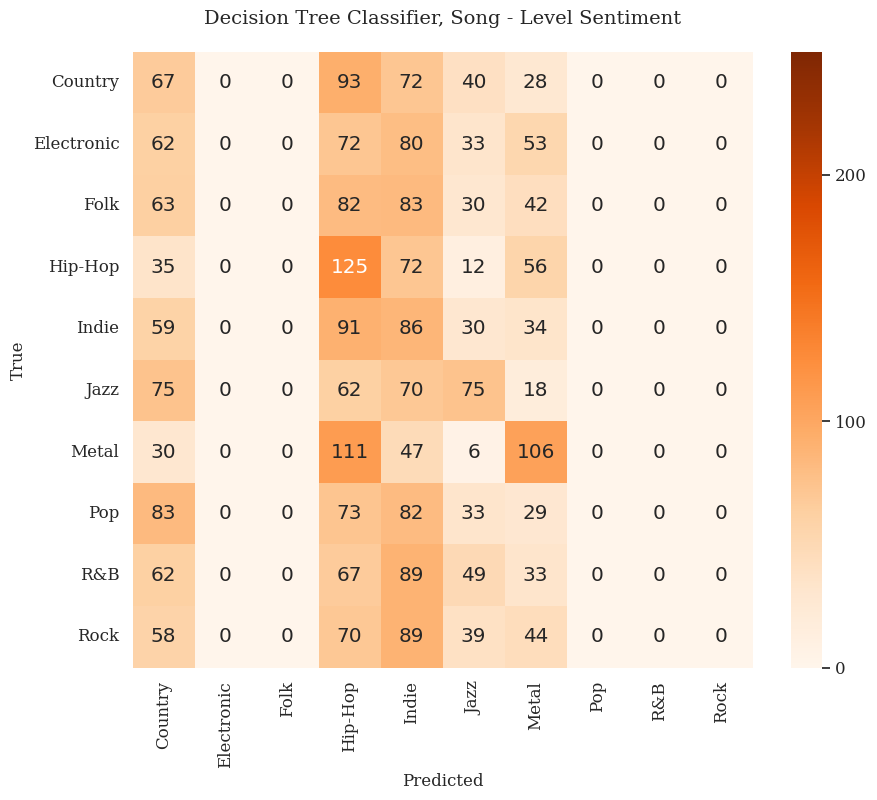

In [17]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm, annot=True,fmt='d',cmap='Oranges',xticklabels=genre_names,yticklabels=genre_names,vmin=0,
    vmax=250,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    fontdict={'fontsize': 12, 'fontweight': 'normal', 'fontfamily': 'Serif'},
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontdict={'fontsize': 12, 'fontweight': 'normal', 'fontfamily': 'Serif'},
)

cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_major_locator(MultipleLocator(100))

for label in cbar.ax.yaxis.get_ticklabels():
    label.set_fontname('Serif')
    label.set_fontsize(12)

plt.xlabel('Predicted', fontsize=12, fontfamily='Serif')
plt.ylabel('True', fontsize=12, fontfamily='Serif')
plt.title('Decision Tree Classifier, Song - Level Sentiment', fontsize=14, fontfamily='Serif', pad = 20)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/dtc_song_level_sentiment.png', bbox_inches='tight')

In [ ]:
dump(model_dtc_sent, '/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/dtc_song_level_sentiment.joblib')

['/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/dtc_song_level_sentiment.joblib']

In [ ]:
reload_test = load('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/dtc_song_level_sentiment.joblib')

In [ ]:
reload_test.predict(np.array(X_val).reshape(-1,1))

array(['Metal', 'Jazz', 'Indie', ..., 'Hip-Hop', 'Indie', 'Hip-Hop'],
      dtype=object)

## Lyric/Line - Level Models

### 1. Split data into training and testing, use same split as in the other content model

In [18]:
train_lr_sent_line, val_lr_sent_line = train_test_split(sent_data_subset_line, test_size=0.2, random_state=24, stratify = sent_data_subset_line['Genre'])

In [19]:
X_train_line = np.array(train_lr_sent_line['SentimentLines'])
y_train_line = train_lr_sent_line['Genre']

X_val_line = np.array(val_lr_sent_line['SentimentLines'])
y_val_line = val_lr_sent_line['Genre']

In [20]:
X_train_line = np.array([ast.literal_eval(s) for s in X_train_line])
X_val_line = np.array([ast.literal_eval(s) for s in X_val_line])

In [21]:
X_train_line

array([list([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -2, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]),
       list([0, 0, 2, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1]),
       list([0, -1, 2, -1, 0, 1, 2, 2, 0, 0, 2, 2, -2, 1, 2, 1]), ...,
       list([3]),
       list([-1, 0, 1, 0, -3, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       list([0, 0, 0, -1, -1, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0, -1])],
      dtype=object)

Have to do one hot encoding because the genres are strings of genre names, not numbers.

In [22]:
label_encoder = LabelEncoder()
y_train_line_encoded = label_encoder.fit_transform(y_train_line)
y_train_one_hot = to_categorical(y_train_line_encoded, num_classes=10)

In [23]:
X_train_line = np.array(X_train_line)
y_train_one_hot = np.array(y_train_one_hot)

Must pad the sentiment evaluation numbers, because some songs have fewer lines than others. The max number of lines is 41, which is not too large to have to truncate, so everything can be padded.

In [24]:
max_sequence_length = 41
X_train_padded = pad_sequences(X_train_line, maxlen=max_sequence_length, padding='post', truncating='post')

Need to shift all values up by 5 because the RNN can not take negative numbers.

In [25]:
X_train_padded_shifted = X_train_padded + 5
print(X_train_padded_shifted)

[[5 6 5 ... 5 5 5]
 [5 5 7 ... 5 5 5]
 [5 4 7 ... 5 5 5]
 ...
 [8 5 5 ... 5 5 5]
 [4 5 6 ... 5 5 5]
 [5 5 5 ... 4 5 5]]


Perform same processing steps to the validation data

In [26]:
y_val_line_encoded = label_encoder.fit_transform(y_val_line)
y_val_one_hot = to_categorical(y_val_line_encoded, num_classes=10)

In [27]:
X_val_line = np.array(X_val_line)
y_val_one_hot = np.array(y_val_one_hot)

In [28]:
X_val_padded = pad_sequences(X_val_line, maxlen=41, padding='post', truncating='post')
X_val_padded_shifted = X_val_padded + 5

### 2. Recurrent Neural Network

#### a. Train/Compile the Model

In [ ]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=100, output_dim=32, input_length=41))
model_rnn.add(SimpleRNN(units=32, activation = 'tanh'))
model_rnn.add(Dense(units=10, activation='softmax'))

model_rnn.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy']) #I tested adam and sgd optimizers, RMSprop was the highest performing on test set

model_rnn.fit(X_train_padded_shifted, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
y_pred_line = model_rnn.predict(X_val_padded_shifted)

94/94 [==============================] - 0s 2ms/step


Saving the model for use in ensemble

In [ ]:
model_rnn.save("/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/model_sentiment_line_rnn")

In [30]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/model_sentiment_line_rnn")

In [31]:
y_pred_line = loaded_model.predict(X_val_padded_shifted)

94/94 [==============================] - 1s 4ms/step


#### b. Evaluate the model

In [32]:
y_pred_indices = np.argmax(y_pred_line, axis=1)
y_val_indices = np.argmax(y_val_one_hot, axis=1)

accuracy = accuracy_score(y_val_indices, y_pred_indices)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.2853333333333333


In [33]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_val_indices, y_pred_indices)

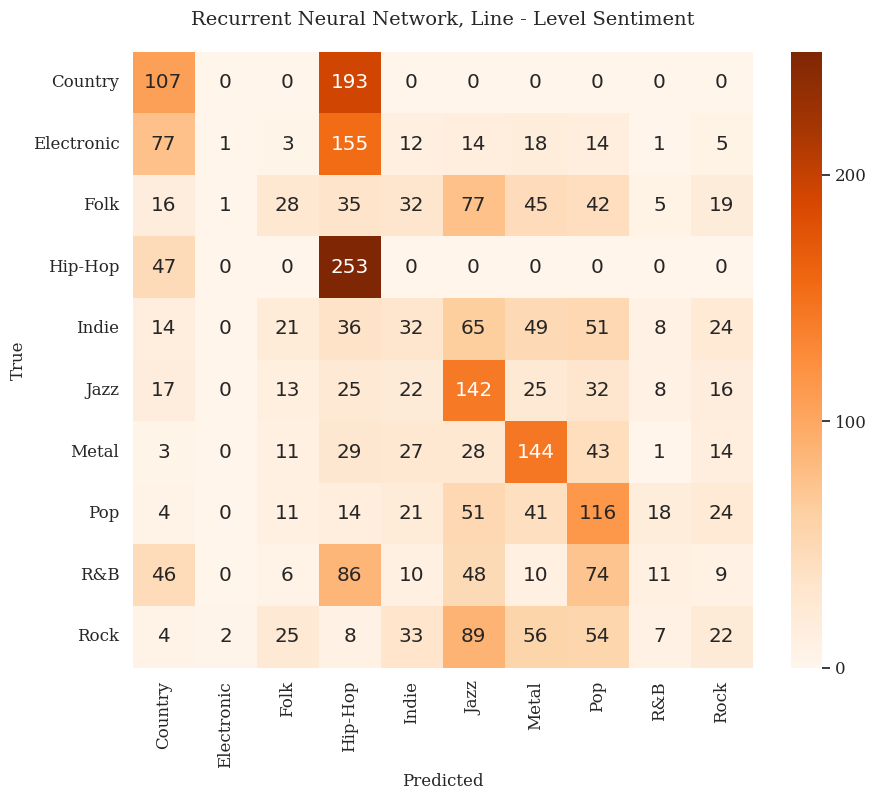

In [34]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm, annot=True,fmt='d',cmap='Oranges',xticklabels=genre_names,yticklabels=genre_names,vmin=0,
    vmax=250,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    fontdict={'fontsize': 12, 'fontweight': 'normal', 'fontfamily': 'Serif'},
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontdict={'fontsize': 12, 'fontweight': 'normal', 'fontfamily': 'Serif'},
)

cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_major_locator(MultipleLocator(100))

for label in cbar.ax.yaxis.get_ticklabels():
    label.set_fontname('Serif')
    label.set_fontsize(12)

plt.xlabel('Predicted', fontsize=12, fontfamily='Serif')
plt.ylabel('True', fontsize=12, fontfamily='Serif')
plt.title('Recurrent Neural Network, Line - Level Sentiment', fontsize=14, fontfamily='Serif', pad = 20)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/rnn_line_level_sentiment.png', bbox_inches='tight')

### 3. Naive Bayes Classifier

#### a. Train/Compile the Model

In [ ]:
y_train_labels = np.argmax(y_train_one_hot, axis=1)

In [ ]:
model_nb_line = GaussianNB()
model_nb_line.fit(X_train_padded_shifted, np.array(y_train_labels))

GaussianNB()

In [ ]:
y_pred_nb = model_nb_line.predict(X_val_padded_shifted)

#### b. Evaluate the Model


In [ ]:
accuracy = accuracy_score(y_val_indices, y_pred_nb)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.25133333333333335


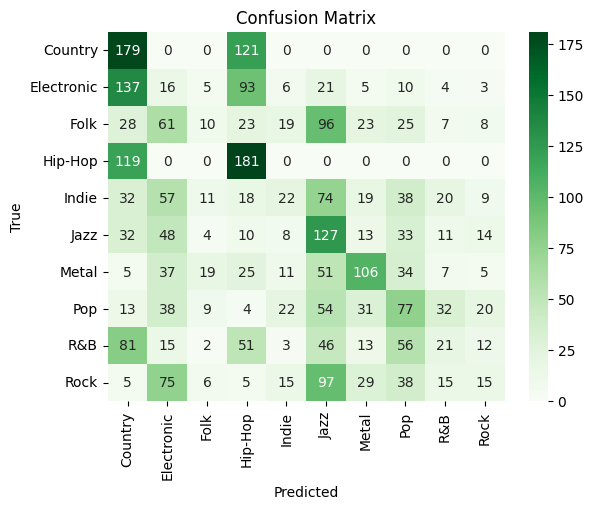

In [ ]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_val_indices, y_pred_nb)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels= genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 4. Decision Tree Classifier

#### a. Train/Compile the Model

In [ ]:
y_train_labels = np.argmax(y_train_one_hot, axis=1)

In [ ]:
model_dtc_line = DecisionTreeClassifier()
model_dtc_line.fit(X_train_padded_shifted, np.array(y_train_labels))

DecisionTreeClassifier()

In [ ]:
y_pred_dtc_line = model_dtc_line.predict(X_val_padded_shifted)

#### b. Evaluate the Model

In [ ]:
accuracy = accuracy_score(y_val_indices, y_pred_dtc_line)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.24533333333333332


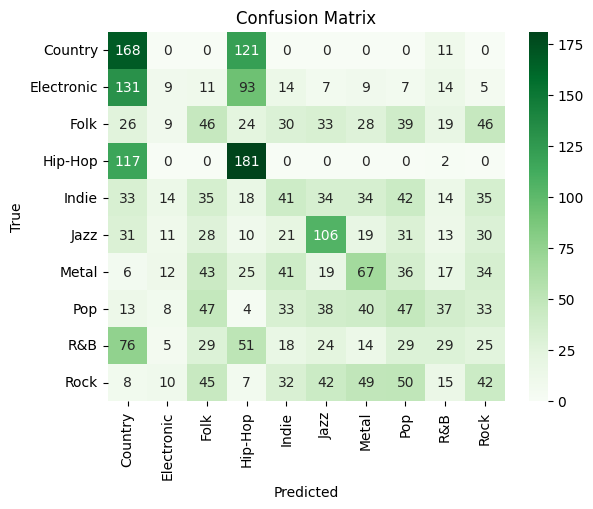

In [ ]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_val_indices, y_pred_dtc_line)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels= genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 5. LSTM Model

#### a. Train/Compile the Model

In [ ]:
model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(units=64, return_sequences=False), input_shape=(41, 1)))
model_lstm.add(Dense(units=10, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [ ]:
batch_size = 64
epochs = 10

model_lstm.fit(X_train_padded_shifted, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
150/150 [==============================] - 52s 345ms/step - loss: 2.3059 - accuracy: 0.1053 - val_loss: 2.2926 - val_accuracy: 0.1275
Epoch 2/10
150/150 [==============================] - 53s 355ms/step - loss: 2.2672 - accuracy: 0.1431 - val_loss: 2.2339 - val_accuracy: 0.1542
Epoch 3/10
150/150 [==============================] - 60s 403ms/step - loss: 2.2354 - accuracy: 0.1734 - val_loss: 2.1947 - val_accuracy: 0.2233
Epoch 4/10
150/150 [==============================] - 63s 423ms/step - loss: 2.2029 - accuracy: 0.1902 - val_loss: 2.2464 - val_accuracy: 0.1650
Epoch 5/10
150/150 [==============================] - 55s 370ms/step - loss: 2.1344 - accuracy: 0.2189 - val_loss: 2.1520 - val_accuracy: 0.2333
Epoch 6/10
150/150 [==============================] - 58s 385ms/step - loss: 2.2734 - accuracy: 0.1483 - val_loss: 2.2940 - val_accuracy: 0.1300
Epoch 7/10
150/150 [==============================] - 54s 362ms/step - loss: 2.2803 - accuracy: 0.1344 - val_loss: 2.2968 - val_ac

#### b. Evaluate the Model

In [ ]:
y_pred = model_lstm.predict(X_val_padded_shifted)

y_true = np.argmax(y_val_one_hot, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
accuracy

94/94 [==============================] - 21s 217ms/step


0.182

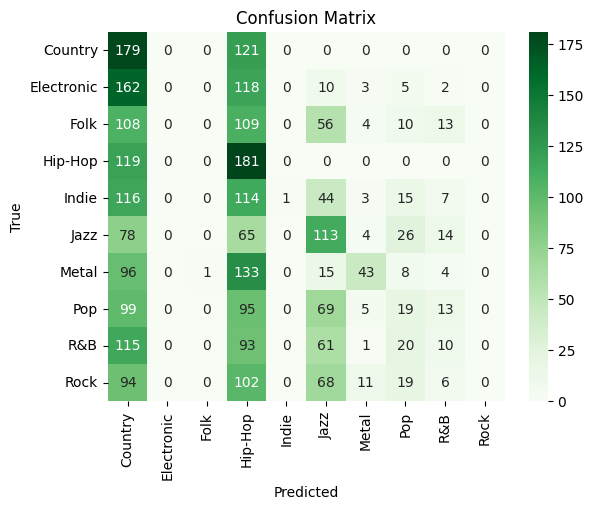

In [ ]:
genre_names = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels= genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()